In [261]:
%pylab inline

from sklearn.datasets import load_boston, load_digits
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.cross_validation import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

from keras.models import Sequential
from keras.layers import Conv1D, Dense, Flatten, Activation, BatchNormalization, Dropout, MaxPool1D, Reshape
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor

from sklearn.metrics import make_scorer, r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from scipy import stats

from pprint import pprint as pp

Populating the interactive namespace from numpy and matplotlib


In [5]:
boston = load_boston()
data = np.random.rand(boston.data.shape[0], boston.data.shape[1] * 5)

correct_indices = []
random_indices = np.arange(65)
for i in range(boston.data.shape[1]):
    data[:, i*5+1] *= i + 1
    data[:, i*5+2] **= 2 + i
    data[:, i*5+4] += i
    data[:, i*5] = boston.data[:, i]
    correct_indices.append(i*5)

correct_indices = np.array(correct_indices) 
random_indices = list(set(random_indices) - set(correct_indices))
random_indices.sort()

train_x, test_x, train_y, test_y = train_test_split(data, 
                                                    boston.target.reshape(-1, 1),
                                                    test_size=0.3)

print('Random Indices:', random_indices)
print('Correct Indices:', correct_indices)
print('train x:', train_x.shape)
print('train y:', train_y.shape)

Random Indices: [1, 2, 3, 4, 6, 7, 8, 9, 11, 12, 13, 14, 16, 17, 18, 19, 21, 22, 23, 24, 26, 27, 28, 29, 31, 32, 33, 34, 36, 37, 38, 39, 41, 42, 43, 44, 46, 47, 48, 49, 51, 52, 53, 54, 56, 57, 58, 59, 61, 62, 63, 64]
Correct Indices: [ 0  5 10 15 20 25 30 35 40 45 50 55 60]
train x: (354, 65)
train y: (354, 1)


# Pearson Correlation

[60]   0.7556 [Correct]
[25]   0.7095 [Correct]
[10]   0.5129 [Correct]
[50]      0.5 [Correct]
[45]   0.4858 [Correct]
[20]    0.436 [Correct]
[0 ]   0.4031 [Correct]
[40]   0.3907 [Correct]
[30]   0.3745 [Correct]
[5 ]   0.3602 [Correct]
[55]   0.3365 [Correct]
[35]   0.2789 [Correct]
[15]   0.1521 [Correct]
[21]   0.1423
[52]   0.1351
[7 ]   0.1105
[51]    0.107
[43]   0.1012
[54]   0.0992
[64]  0.09228
[61]  0.09211
[29]  0.08575
[48]  0.08568
[53]  0.08056
[9 ]  0.07884
[14]  0.07392
[44]  0.06767
[19]   0.0579
[1 ]  0.05346
[6 ]  0.05293
[32]  0.04794
[46]  0.04652
[56]  0.04432
[37]  0.04407
[36]  0.04297
[62]  0.04237
[2 ]  0.03891
[22]  0.03878
[16]  0.03785
[39]  0.03651
[23]  0.03502
[63]  0.03393
[31]  0.03331
[41]  0.03225
[17]  0.03178
[24]  0.03097
[33]  0.02849
[8 ]  0.02847
[58]  0.02774
[18]  0.01988
[57]  0.01801
[47]   0.0159
[4 ]   0.0153
[13]  0.01389
[34]  0.01297
[3 ]  0.01162
[27]  0.01125
[42]   0.0104
[49]  0.01034
[26]  0.00846
[28]  0.00711
[12] 0.006592
[3

<Container object of 52 artists>

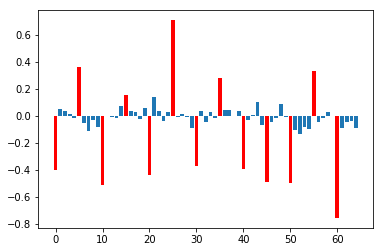

In [6]:
# Calculate Pearson Correlation
correlations = []
for i in range(train_x.shape[1]):
    c = np.corrcoef(train_x[:, i], train_y.reshape(-1))[0, 1]
    t = stats.ttest_1samp(train_y.reshape(-1), c)
    correlations.append((i, c))
correlations = np.array(correlations)


sorted_corrs = sorted(correlations, key=lambda x: -abs(x[1]))
for i, c in  sorted_corrs:
    i = int(i)
    c = abs(c)
    if i in correct_indices:
        print(f'[{i:<2}] {c:8.4} [Correct]')
    else:
        print(f'[{i:<2}] {c:8.4}')

bar(correct_indices, correlations[:, 1][correct_indices], color='red')
bar(random_indices, correlations[:, 1][random_indices])

# Tools

In [7]:
def show_result(y_true, y_pred, sample=30):
    print('R^2:', r2_score(y_true, y_pred))
    print('MSE:', mean_squared_error(y_true, y_pred))
    n = y_pred.shape[0]
    
    fig, plots = subplots(2, 2)
    plots = plots.reshape(-1)
    for p  in plots:
        idx = np.random.randint(0, n-sample)
    
        p.plot(y_true[idx: idx+sample])
        p.plot(y_pred[idx: idx+sample], color='red')

# Lasso Regression

R^2: 0.627604306038
MSE: 35.1803113095


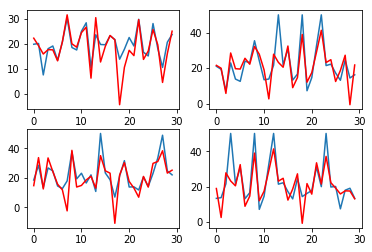

In [8]:
lasso = Lasso(alpha=0.01)
lasso.fit(train_x, train_y)
pred_y = lasso.predict(test_x)

show_result(test_y, pred_y)

<Container object of 52 artists>

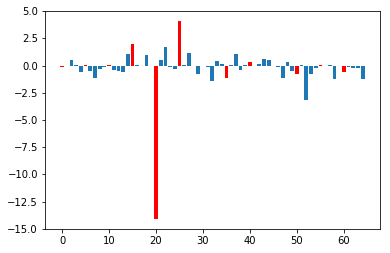

In [9]:
bar(correct_indices, lasso.coef_[correct_indices], color='red')
bar(random_indices, lasso.coef_[random_indices])

# Ridge Regression

R^2: 0.611784479092
MSE: 36.6748141887


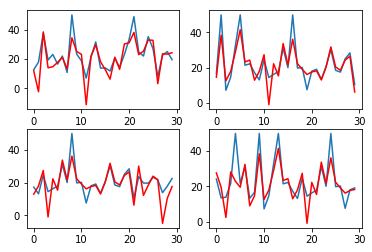

In [10]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_x, train_y)
pred_y = ridge.predict(test_x)

show_result(test_y, pred_y)

[]

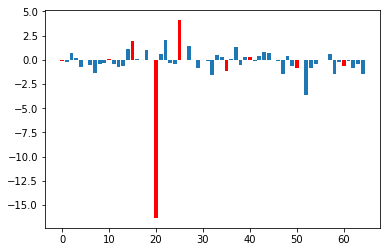

In [11]:
coef = ridge.coef_[0]
bar(correct_indices, coef[correct_indices], color='red')
bar(random_indices, coef[random_indices])
plot()

# Convolution Neural Network

In [262]:
# Scalers
scaler = MinMaxScaler()
scaler.fit(data)
target_scaler = MinMaxScaler()
target_scaler.fit(boston.target.reshape(-1, 1))

# Scaling
dl_train_x = scaler.transform(train_x).reshape(-1, 65)
dl_train_y = target_scaler.transform(train_y)
dl_test_x = scaler.transform(test_x).reshape(-1, 65)
dl_test_y = target_scaler.transform(test_y)

In [269]:
def create_cnn(seed=0):
    np.random.seed(seed)
    cnn = Sequential()
    cnn.add(Dense(65, kernel_regularizer='l1', input_shape=(65,)))
    cnn.add(Activation('relu'))
    cnn.add(Reshape((65, 1)))
    
    cnn.add(Conv1D(filters=164, kernel_size=6, strides=1, padding='same', input_shape=(65, 1)))
    cnn.add(Activation('relu'))
    cnn.add(MaxPool1D(2))
    cnn.add(Dropout(0.3))

    cnn.add(Conv1D(filters=128, kernel_size=5, padding='same', strides=1))
    cnn.add(Activation('relu'))
    cnn.add(MaxPool1D(2))
    cnn.add(Dropout(0.2))

    cnn.add(Conv1D(filters=64, kernel_size=4, padding='same', strides=1))
    cnn.add(Activation('relu'))
    cnn.add(MaxPool1D(2))
    cnn.add(Dropout(0.2))

    cnn.add(Flatten()) # 512
    cnn.add(Dense(256))
    cnn.add(Activation('relu'))
    cnn.add(Dropout(0.1))
    
    cnn.add(Dense(1))
    cnn.add(Activation('sigmoid'))
    
    cnn.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['accuracy'])
    return cnn

cnn = create_cnn()
cnn.fit(dl_train_x, dl_train_y, verbose=2, epochs=1000)
dl_pred_y = cnn.predict(dl_test_x)
# print(dl_pred_y.shape)
# print(dl_test_y.shape)
# show_result(dl_test_y, dl_pred_y)

Epoch 1/1000
6s - loss: 4.4020 - acc: 0.0085
Epoch 2/1000
0s - loss: 3.9248 - acc: 0.0056
Epoch 3/1000
0s - loss: 3.4649 - acc: 0.0056
Epoch 4/1000
0s - loss: 3.0338 - acc: 0.0056
Epoch 5/1000
0s - loss: 2.6373 - acc: 0.0056
Epoch 6/1000
0s - loss: 2.2654 - acc: 0.0056
Epoch 7/1000
0s - loss: 1.9280 - acc: 0.0198
Epoch 8/1000
0s - loss: 1.6131 - acc: 0.0085
Epoch 9/1000
0s - loss: 1.3415 - acc: 0.0254
Epoch 10/1000
0s - loss: 1.0898 - acc: 0.0056
Epoch 11/1000
0s - loss: 0.8622 - acc: 0.0056
Epoch 12/1000
0s - loss: 0.6686 - acc: 0.0141
Epoch 13/1000
0s - loss: 0.4982 - acc: 0.0169
Epoch 14/1000
0s - loss: 0.3580 - acc: 0.0198
Epoch 15/1000
0s - loss: 0.2461 - acc: 0.0226
Epoch 16/1000
0s - loss: 0.1663 - acc: 0.0169
Epoch 17/1000
0s - loss: 0.1057 - acc: 0.0141
Epoch 18/1000
0s - loss: 0.0705 - acc: 0.0198
Epoch 19/1000
0s - loss: 0.0589 - acc: 0.0226
Epoch 20/1000
0s - loss: 0.0489 - acc: 0.0226
Epoch 21/1000
0s - loss: 0.0420 - acc: 0.0226
Epoch 22/1000
0s - loss: 0.0380 - acc: 0.02

R^2: 0.771138881315
MSE: 0.0106768223481


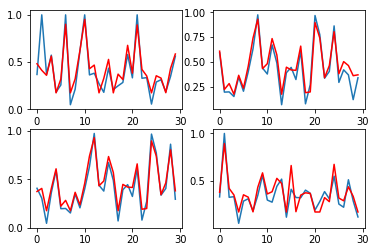

In [270]:
dl_pred_y = cnn.predict(dl_test_x).reshape(-1, 1)
show_result(dl_test_y, dl_pred_y)

# Deep Neural Network

In [7]:
dl_train_x = dl_train_x.reshape(-1, 65)
dl_test_x = dl_test_x.reshape(-1, 65)

In [281]:
def create_model(seed=0, w1=65, w2=256, w3=164, w4=128, dout1=0.3, dout2=0.3, dout3=0.1):
    print(f'[Created Model] seed={seed}, w1={w1}, w2={w2}, w3={w3}, w4={w4}, '
          f'dout1={dout1}, dout2={dout2}, dout3={dout3}')
    np.random.seed(seed)
    
    dnn = Sequential()
    dnn.add(Dense(w1, kernel_regularizer='l1', batch_input_shape=(None, 65)))
    dnn.add(LeakyReLU())
    if dout1:
        dnn.add(Dropout(dout1))

    dnn.add(Dense(w2))
    dnn.add(LeakyReLU())
    if dout2:
        dnn.add(Dropout(dout2))

    dnn.add(Dense(w3))
    dnn.add(LeakyReLU())
    if dout3:
        dnn.add(Dropout(dout3))
    
    dnn.add(Dense(w4))
    dnn.add(LeakyReLU())

    dnn.add(Dense(1, activation='sigmoid'))
    dnn.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['accuracy'])
    return dnn

dnn = create_model()
history = dnn.fit(dl_train_x, dl_train_y, verbose=2, epochs=600)

[Created Model] seed=0, w1=65, w2=256, w3=164, w4=128, dout1=0.3, dout2=0.3, dout3=0.1
Epoch 1/600
6s - loss: 4.4041 - acc: 0.0085
Epoch 2/600
0s - loss: 3.9224 - acc: 0.0056
Epoch 3/600
0s - loss: 3.4647 - acc: 0.0085
Epoch 4/600
0s - loss: 3.0391 - acc: 0.0113
Epoch 5/600
0s - loss: 2.6402 - acc: 0.0056
Epoch 6/600
0s - loss: 2.2707 - acc: 0.0113
Epoch 7/600
0s - loss: 1.9294 - acc: 0.0085
Epoch 8/600
0s - loss: 1.6155 - acc: 0.0085
Epoch 9/600
0s - loss: 1.3369 - acc: 0.0169
Epoch 10/600
0s - loss: 1.0830 - acc: 0.0056
Epoch 11/600
0s - loss: 0.8574 - acc: 0.0056
Epoch 12/600
0s - loss: 0.6606 - acc: 0.0113
Epoch 13/600
0s - loss: 0.4915 - acc: 0.0085
Epoch 14/600
0s - loss: 0.3511 - acc: 0.0113
Epoch 15/600
0s - loss: 0.2421 - acc: 0.0113
Epoch 16/600
0s - loss: 0.1614 - acc: 0.0141
Epoch 17/600
0s - loss: 0.1175 - acc: 0.0169
Epoch 18/600
0s - loss: 0.0812 - acc: 0.0056
Epoch 19/600
0s - loss: 0.0757 - acc: 0.0085
Epoch 20/600
0s - loss: 0.0614 - acc: 0.0226
Epoch 21/600
0s - loss

R^2: 0.782234465786
MSE: 0.0101591914595


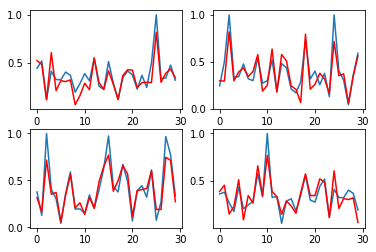

In [288]:
pred_y = dnn.predict(dl_test_x).reshape(-1, 1)
show_result(dl_test_y, pred_y)

## Hyperparameter Optimization

In [283]:
# Custom Scorer
def custom_accuracy(y_true, y_pred):
    y_true = y_true.reshape((-1, 1))
    y_pred = y_pred.reshape((-1, 1))
    score = r2_score(y_true, y_pred, multioutput='variance_weighted')
    mse = ((y_true - y_pred)**2).mean()
#     print(f'mse:{mse}, r^2:{score}')
    return score

params = dict(seed=[0, 3, 7, 13, 20],
              w1=[65],
              w2=[65, 256, 512],
              w3=[256, 164],
              w4=[128],
              dout1=[0.5, 0.3, None],
              dout2=[0.4, 0.2, None],
              dout3=[0.2, None], 
              epochs=[600])

classifier = KerasRegressor(create_model, verbose=0)
scorer = make_scorer(custom_accuracy, greater_is_better=True)
search = RandomizedSearchCV(classifier, param_distributions=params, scoring=scorer, n_jobs=1, n_iter=200)
search_result = search.fit(dl_train_x, dl_train_y)

[Created Model] seed=0, w1=65, w2=256, w3=164, w4=128, dout1=0.5, dout2=0.4, dout3=None
[Created Model] seed=0, w1=65, w2=256, w3=164, w4=128, dout1=0.5, dout2=0.4, dout3=None
[Created Model] seed=0, w1=65, w2=256, w3=164, w4=128, dout1=0.5, dout2=0.4, dout3=None
[Created Model] seed=3, w1=65, w2=65, w3=256, w4=128, dout1=None, dout2=None, dout3=None
[Created Model] seed=3, w1=65, w2=65, w3=256, w4=128, dout1=None, dout2=None, dout3=None
[Created Model] seed=3, w1=65, w2=65, w3=256, w4=128, dout1=None, dout2=None, dout3=None
[Created Model] seed=13, w1=65, w2=512, w3=256, w4=128, dout1=0.3, dout2=0.2, dout3=None
[Created Model] seed=13, w1=65, w2=512, w3=256, w4=128, dout1=0.3, dout2=0.2, dout3=None
[Created Model] seed=13, w1=65, w2=512, w3=256, w4=128, dout1=0.3, dout2=0.2, dout3=None
[Created Model] seed=3, w1=65, w2=256, w3=164, w4=128, dout1=None, dout2=0.4, dout3=0.2
[Created Model] seed=3, w1=65, w2=256, w3=164, w4=128, dout1=None, dout2=0.4, dout3=0.2
[Created Model] seed=3, w1

In [309]:
_mean_scores = search_result.cv_results_['mean_test_score']
_stds = search_result.cv_results_['std_test_score']
_params = search_result.cv_results_['params']

# Best
print('[Best]')
print('Best Score:', search_result.best_score_)
pp(search_result.best_params_)
print()

# Rank
rank = list(zip(_mean_scores, _stds, _params))
rank.sort(key=lambda x: -x[0])
for mean, std, param in rank:
    print(f'mean:{mean:.7},\tstd:{std:.5}')
    pp(params)
    print()    

[Best]
Best Score: 0.726974984172
{'dout1': 0.3,
 'dout2': 0.4,
 'dout3': None,
 'epochs': 600,
 'seed': 13,
 'w1': 65,
 'w2': 65,
 'w3': 164,
 'w4': 128}

mean:0.726975,	std:0.12468
{'dout1': 0.3,
 'dout2': 0.4,
 'dout3': None,
 'seed': 13,
 'w1': 65,
 'w2': 65,
 'w3': 164,
 'w4': 128}

mean:0.7267626,	std:0.099389
{'dout1': 0.3,
 'dout2': 0.4,
 'dout3': None,
 'seed': 13,
 'w1': 65,
 'w2': 65,
 'w3': 164,
 'w4': 128}

mean:0.7265085,	std:0.096829
{'dout1': 0.3,
 'dout2': 0.4,
 'dout3': None,
 'seed': 13,
 'w1': 65,
 'w2': 65,
 'w3': 164,
 'w4': 128}

mean:0.7252138,	std:0.10591
{'dout1': 0.3,
 'dout2': 0.4,
 'dout3': None,
 'seed': 13,
 'w1': 65,
 'w2': 65,
 'w3': 164,
 'w4': 128}

mean:0.7223417,	std:0.11018
{'dout1': 0.3,
 'dout2': 0.4,
 'dout3': None,
 'seed': 13,
 'w1': 65,
 'w2': 65,
 'w3': 164,
 'w4': 128}

mean:0.7208521,	std:0.083792
{'dout1': 0.3,
 'dout2': 0.4,
 'dout3': None,
 'seed': 13,
 'w1': 65,
 'w2': 65,
 'w3': 164,
 'w4': 128}

mean:0.7192047,	std:0.090703
{'dout1':

[Created Model] seed=13, w1=65, w2=65, w3=164, w4=128, dout1=0.3, dout2=0.4, dout3=None
Epoch 1/600
45s - loss: 4.3423 - acc: 0.0085
Epoch 2/600
0s - loss: 3.8641 - acc: 0.0056
Epoch 3/600
0s - loss: 3.4095 - acc: 0.0056
Epoch 4/600
0s - loss: 2.9845 - acc: 0.0113
Epoch 5/600
0s - loss: 2.5873 - acc: 0.0085
Epoch 6/600
0s - loss: 2.2228 - acc: 0.0085
Epoch 7/600
0s - loss: 1.8863 - acc: 0.0141
Epoch 8/600
0s - loss: 1.5778 - acc: 0.0113
Epoch 9/600
0s - loss: 1.2991 - acc: 0.0056
Epoch 10/600
0s - loss: 1.0488 - acc: 0.0085
Epoch 11/600
0s - loss: 0.8255 - acc: 0.0141
Epoch 12/600
0s - loss: 0.6362 - acc: 0.0085
Epoch 13/600
0s - loss: 0.4712 - acc: 0.0141
Epoch 14/600
0s - loss: 0.3383 - acc: 0.0085
Epoch 15/600
0s - loss: 0.2287 - acc: 0.0169
Epoch 16/600
0s - loss: 0.1506 - acc: 0.0056
Epoch 17/600
0s - loss: 0.0950 - acc: 0.0113
Epoch 18/600
0s - loss: 0.0690 - acc: 0.0169
Epoch 19/600
0s - loss: 0.0543 - acc: 0.0113
Epoch 20/600
0s - loss: 0.0540 - acc: 0.0198
Epoch 21/600
0s - lo

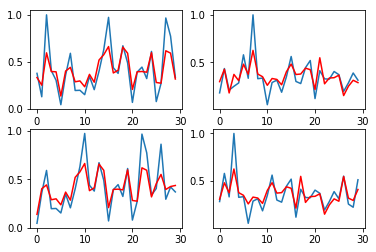

In [310]:
params = search_result.best_params_.copy()
del params['epochs']
dnn = create_model(**params)
history = dnn.fit(dl_train_x, dl_train_y, verbose=2, epochs=search_result.best_params_['epochs'])
pred_y = dnn.predict(dl_test_x).reshape(-1, 1)

show_result(dl_test_y, pred_y)
print('Epoch:', len(history.epoch))